In [1]:
#from sklearn.preprocessing import LabelBinarizer
#from tensorflow import keras
#from keras.utils import plot_model

#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import csv
import cv2
import os
from numpy import genfromtxt
import requests
import re

import tensorflow as tf
from tensorflow import keras

from keras import datasets, layers, models
import matplotlib.pyplot as plt


In [79]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#print(train_images[0][0])

train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(type(train_images[0]))
print(train_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [21]:
#letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
#path = "./ASL_CSV/train/"
#df = pd.read_csv("ASL_CSV/train/A/A1.csv", sep = ',')

letter = "A"
num = 2
df = pd.read_csv('./ASL_CSV/train/'+ letter + '/' + letter + str(num) + '.csv', sep=',', header=None)

array = df.to_numpy()
result = array.flatten()
string = ""
for x in result:
    replaced = re.sub("[^0-9 ]+", "", x)
    replaced = re.sub(' +', ' ', replaced).strip()
    string += (" " + replaced)

string = string.split(" ")

string[0] = "A"
df2 = pd.DataFrame(columns=np.arange(40001))
df2.rename(columns={0:"Labels"}, inplace = True)
df2.loc[len(df2)] = string

print(df2.shape[1])
print(df2)


    




40001
  Labels   1   2   3   4   5   6   7   8   9  ... 39991 39992 39993 39994  \
0      A  33  30  31  30  29  30  29  28  28  ...    28    28    26    29   

  39995 39996 39997 39998 39999 40000  
0    29    29    29    29    30    28  

[1 rows x 40001 columns]


In [60]:
def CSV_To_Dataframe(letter, start, end):
    path = "./ASL_CSV/train/"
    data = []
    for num in range(start, end):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',sep=',',header= None)
        array = df.to_numpy()
        result = array.flatten()
        
        string = ""
        arr = []
        for x in result:
            replaced = re.sub("[^0-9 ]+", "", x)
            replaced = re.sub(' +', ' ', replaced).strip()
            replaced = replaced.split(" ")
            replaced = [(eval(i)/255) for i in replaced]
            #print(replaced)
            #string += (" " + replaced)
            arr.append(replaced)
        
        data.append(arr)
        #string = string.split(" ")
        #string.pop(0)
        #string = [(eval(i)/255) for i in string]
        #print(string)
        #data.append(string)
    np_data = np.array(data)
    #print(np_data.shape)
    return np_data
#print(len(CSV_To_Dataframe("A")))
#print(CSV_To_Dataframe("A"))


In [91]:
def create_data(letters, start, end):
    data = np.concatenate([CSV_To_Dataframe(x, start, end) for x in letters])
    return data

#create_data("AB", 100)
        



In [92]:
#master_df = pd.DataFrame(columns = np.arange(100))
#master_df.rename(columns = {0:"Labels"}, inplace = True)
#count = 0
""" def Fill_Dataframe():
    letters = "A" #BCDEFGHIJKLMNOPQRSTUVWXYZ"
    for letter in letters:
        list = CSV_To_Dataframe(letter)
        master_df.loc[len(master_df)] = list
        #count+=1
        #print(count)
    
Fill_Dataframe() """
#print(master_df)


master_df = create_data("ABC", 1, 101)
test_df = create_data("ABC", 101, 201)


In [8]:
""" test_df = pd.DataFrame(columns = np.arange(100))
#master_df.rename(columns = {0:"Labels"}, inplace = True)
count = 0
def Fill_Dataframe():
    letters = "A" #BCDEFGHIJKLMNOPQRSTUVWXYZ"
    for letter in letters:
        list = CSV_To_Dataframe(letter)
        test_df.loc[len(master_df)] = list
        #count+=1
        #print(count)
    
Fill_Dataframe() """
#print(master_df)

In [93]:
print(master_df.shape)
print(test_df.shape)
print(master_df)

(300, 200, 200)
(300, 200, 200)
[[[0.11764706 0.11372549 0.12156863 ... 0.11372549 0.1254902  0.10980392]
  [0.11372549 0.10980392 0.1254902  ... 0.12156863 0.10196078 0.13333333]
  [0.10588235 0.12156863 0.18431373 ... 0.72941176 0.69803922 0.10196078]
  ...
  [0.1254902  0.09803922 0.55686275 ... 0.5372549  0.54509804 0.10588235]
  [0.11372549 0.12156863 0.54117647 ... 0.54901961 0.51372549 0.1254902 ]
  [0.11372549 0.11764706 0.10980392 ... 0.11372549 0.1254902  0.10588235]]

 [[0.12941176 0.11764706 0.12156863 ... 0.11372549 0.11764706 0.11372549]
  [0.12156863 0.10980392 0.1254902  ... 0.10980392 0.11372549 0.12941176]
  [0.11764706 0.1254902  0.18431373 ... 0.74509804 0.68627451 0.09803922]
  ...
  [0.1254902  0.09411765 0.55294118 ... 0.54117647 0.5372549  0.11372549]
  [0.10980392 0.11372549 0.54117647 ... 0.54509804 0.52156863 0.12156863]
  [0.11764706 0.11372549 0.11372549 ... 0.11372549 0.11764706 0.10980392]]

 [[0.12156863 0.11764706 0.11372549 ... 0.11372549 0.11764706 0.

In [95]:
data_a = master_df
labels = [[1]]*100 + [[2]]*100 + [[3]]*100
labels = np.array(labels)
#labels = np.reshape(labels, (200,1))
#print(type(labels))
#print(labels)

In [96]:



model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(master_df, labels, epochs=10, 
                    validation_data=(test_df, labels))

Epoch 1/10
10/10 [==============================] - 6s 552ms/step - loss: 1.1547 - accuracy: 0.4900 - val_loss: 0.7631 - val_accuracy: 0.7333
Epoch 2/10
10/10 [==============================] - 5s 511ms/step - loss: 0.3626 - accuracy: 0.9300 - val_loss: 0.8917 - val_accuracy: 0.8033
Epoch 3/10
10/10 [==============================] - 5s 512ms/step - loss: 0.0709 - accuracy: 0.9967 - val_loss: 0.9275 - val_accuracy: 0.8600
Epoch 4/10
10/10 [==============================] - 6s 568ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.3202 - val_accuracy: 0.8333
Epoch 5/10
10/10 [==============================] - 6s 560ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3701 - val_accuracy: 0.8367
Epoch 6/10
10/10 [==============================] - 6s 638ms/step - loss: 6.7711e-04 - accuracy: 1.0000 - val_loss: 1.5013 - val_accuracy: 0.8433
Epoch 7/10
10/10 [==============================] - 6s 637ms/step - loss: 4.1806e-04 - accuracy: 1.0000 - val_loss: 1.4785 - val_accuracy: 0.843

10/10 - 1s - loss: 1.4587 - accuracy: 0.8533 - 1s/epoch - 110ms/step


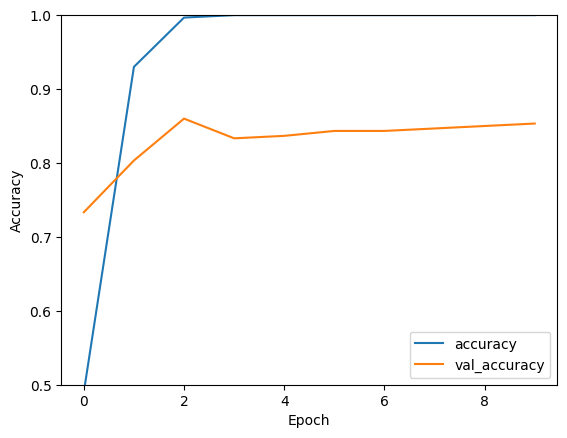

In [97]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_df,  labels, verbose=2)

In [98]:
print(test_acc)
print(test_loss)


0.8533333539962769
1.4586859941482544
